# Pandas Basics <hr style="border:2.5px solid #126782"></hr>

In [85]:
%pip install matplotlib --upgrade

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp313-cp313-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
%pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [88]:
data  = { "name": ["Henry","Owen", "Ada"],
         "age": [22,35,58],
         "sex": ["M","M","F"] }

In [89]:
df = pd.DataFrame(data)
df

,name,age,sex
0,Henry,22,M
1,Owen,35,M
2,Ada,58,F


In [90]:
df.corr

<bound method DataFrame.corr of     name  age sex
0  Henry   22   M
1   Owen   35   M
2    Ada   58   F>

In [91]:
df["name"]

0    Henry
1     Owen
2      Ada
Name: name, dtype: object

In [92]:
df['age'].mean()

np.float64(38.333333333333336)

In [93]:
df['age'].sum()

np.int64(115)

In [94]:
df["sex"]

0    M
1    M
2    F
Name: sex, dtype: object

 
# Correlation

In [113]:
measurement = { "current":[2.0,3.5,1.8,4.2,2.7],"power":[100,200,90,210,110] }

measurement 

{'current': [2.0, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [114]:
device = pd.DataFrame(measurement)
device

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [115]:
# Finding the covariance between current and power     
device.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [116]:
# Finding the correlation between current and power
device.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [118]:
# Describing the dataset
device.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter Plot

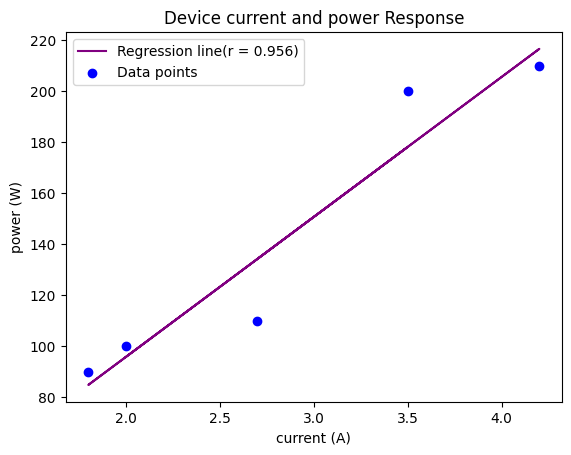

In [128]:
x = device['current'] 
y = device['power']


m, b, r, p_value, std_err = stats.linregress(x, y)    
line = m*x + b  
plt.plot(x,line
        , color='purple', label=f'Regression line(r = {r:.3f})')
plt.scatter(x,y, color='blue', label='Data points')
plt.title('Device current and power Response')
plt.ylabel('power (W)')
plt.xlabel('current (A)')
plt.legend()
plt.show()


## Resistance Test

In [129]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [140]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [131]:
pan_mean = resistance['Panther'].mean() 
pan_mean    

np.float64(10.75)

In [134]:
resistance['Panther'].fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [135]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

# Bar Graph

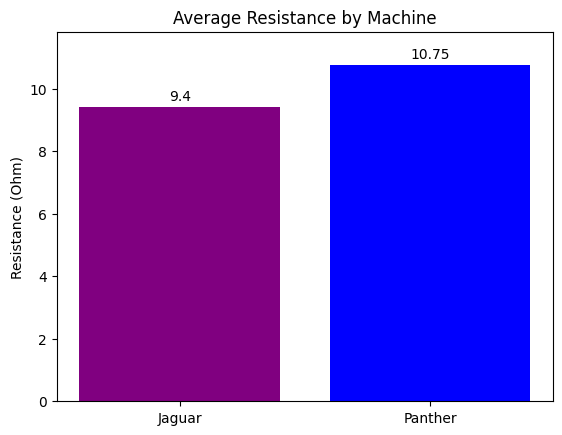

In [161]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean,pan_mean],color=['purple','blue'])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (Ohm)')

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) #10%
plt.show()


